
## 05 Hyperparameter Tuning
**Objetivo**: Optimizar los hiperparámetros del modelo seleccionado.
**Contenido**:
- Uso de técnicas como Grid Search y Random Search.
- Evaluación del rendimiento del modelo optimizado.


In [53]:
## Importar librerías
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

## Cargar dataset de entranamiento y evaluación

In [57]:

dir_data_processed = '../data/processed'
ruta_archivo_X = os.path.join(dir_data_processed, 'X_train_resampled.csv')
X_train_resampled = pd.read_csv(ruta_archivo_X)

ruta_archivo_y = os.path.join(dir_data_processed, 'y_train_resampled.csv')
y_train_resampled = pd.read_csv(ruta_archivo_y)

ruta_archivo_X = os.path.join(dir_data_processed, 'X_val.csv')
X_val = pd.read_csv(ruta_archivo_X)

ruta_archivo_y = os.path.join(dir_data_processed, 'y_val.csv')
y_val = pd.read_csv(ruta_archivo_y)


In [58]:
X_train_resampled.columns

Index(['TransactionDT', 'TransactionAmt', 'dist1', 'card1', 'card2', 'card3',
       'card5', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10',
       'C11', 'C12', 'C13', 'C14', 'ProductCD_W', 'card4_discover',
       'card4_mastercard', 'card4_visa', 'card6_credit', 'card6_debit',
       'card6_debit or credit', 'P_emaildomain_0', 'P_emaildomain_1',
       'P_emaildomain_2', 'P_emaildomain_3', 'P_emaildomain_4',
       'P_emaildomain_5', 'addr_combined_0', 'addr_combined_1',
       'addr_combined_2', 'addr_combined_3', 'addr_combined_4',
       'addr_combined_5', 'addr_combined_6'],
      dtype='object')

In [59]:
X_train_resampled.shape, y_train_resampled.shape

((5116, 41), (5116, 1))

In [60]:
X_val.shape, y_val.shape

((28125, 41), (28125, 1))

## Definir el modelo base

In [61]:

rf = RandomForestClassifier(random_state=42)
y_train_resampled = y_train_resampled.values.ravel()
y_val = y_val.values.ravel()

##  Definir los parámetros para Grid Search y Random Search

In [62]:
# # Definir los parámetros que se van a probar en Grid Search
# param_grid = {
#     'n_estimators': [100, 200, 300],  # Número de árboles en el bosque
#     'max_features': ['sqrt', 'log2'],  # Número máximo de features consideradas para dividir un nodo
#     'max_depth': [None, 10, 20, 30],  # Profundidad máxima del árbol
#     'min_samples_split': [2, 5, 10],  # Número mínimo de muestras requeridas para dividir un nodo interno
#     'min_samples_leaf': [1, 2, 4],  # Número mínimo de muestras requeridas para ser una hoja
#     'bootstrap': [True, False]  # Método de muestreo de instancias para construir árboles
# }

# # Inicializar Grid Search
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)


In [63]:
# Definir la distribución de parámetros para Random Search
param_dist = {
    # 'n_estimators': [100, 200, 300, 400, 500],
    # 'max_features': ['auto', 'sqrt', 'log2'],
    # 'max_depth': [None, 10, 20, 30, 40, 50],
    # 'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4],
    # 'bootstrap': [True, False]
}

# Inicializar Random Search
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=5, scoring='roc_auc', n_jobs=-1, random_state=42)


## Entrenar y ajustar hiperparámetros

Combinamos Grid Search y Random Search para explorar de manera exhaustiva y eficiente el espacio de hiperparámetros. Utilizamos Grid Search inicialmente para realizar una búsqueda amplia de hiperparámetros, seguida de Random Search para refinar y buscar de manera más precisa dentro de las regiones prometedoras identificadas.

### Grid Search

In [64]:
# grid_search.fit(X_train_resampled, y_train_resampled)
# print("Mejores hiperparámetros encontrados por Grid Search:")
# print(grid_search.best_params_)


### Random Search

In [65]:
# # Definir la distribución de parámetros para Random Search
# param_dist = {
#     'n_estimators': [100, 200, 300, 400, 500],  # Número de árboles en el bosque
#     'max_features': ['sqrt', 'log2', None],     # Número de características a considerar en cada división
#     'max_depth': [10, 20, 30, 40, 50, None],    # Profundidad máxima del árbol
#     'min_samples_split': [2, 5, 10],            # Número mínimo de muestras necesarias para dividir un nodo
#     'min_samples_leaf': [1, 2, 4],              # Número mínimo de muestras necesarias en un nodo hoja
#     'bootstrap': [True, False]                  # Método para seleccionar muestras para entrenar cada árbol
# }

# # Inicializar Random Search
# random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=5, scoring='roc_auc', n_jobs=-1, random_state=42)


In [66]:
# Definir la distribución de parámetros para Random Search
param_dist = {
    'n_estimators': [400],  # Número de árboles en el bosque
    'max_features': ['log2'],     # Número de características a considerar en cada división
    'max_depth': [20],    # Profundidad máxima del árbol
    'min_samples_split': [2],            # Número mínimo de muestras necesarias para dividir un nodo
    'min_samples_leaf': [1],              # Número mínimo de muestras necesarias en un nodo hoja
    'bootstrap': [False]                  # Método para seleccionar muestras para entrenar cada árbol
}

# Inicializar Random Search
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=5, scoring='roc_auc', n_jobs=-1, random_state=42)


In [67]:
random_search.fit(X_train_resampled, y_train_resampled)
print("Mejores hiperparámetros encontrados por Random Search:")
print(random_search.best_params_)


/home/joseph/Documents/proyecto-portafolio/deteccion_fraude/venv/lib/python3.11/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 1 is smaller than n_iter=100. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejores hiperparámetros encontrados por Random Search:
{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': False}


## Evaluar el modelo optimizado

In [68]:
# Función para evaluar el rendimiento del modelo
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Classification Report:")
    roc_auc = roc_auc_score(y_val, y_pred)
    print(f'Área bajo la curva ROC (ROC AUC): {roc_auc:.2f}')
    print(classification_report(y_test, y_pred))

# Evaluación del modelo con los mejores parámetros encontrados por Grid Search
# best_grid_model = grid_search.best_estimator_
# print("Rendimiento del modelo con mejores parámetros (Grid Search):")
# evaluate_model(best_grid_model, X_val, y_val)

# Evaluación del modelo con los mejores parámetros encontrados por Random Search
best_random_model = random_search.best_estimator_
print("Rendimiento del modelo con mejores parámetros (Random Search):")
evaluate_model(best_random_model, X_val, y_val)

Rendimiento del modelo con mejores parámetros (Random Search):
Accuracy: 0.8960711111111112
Classification Report:
Área bajo la curva ROC (ROC AUC): 0.89
              precision    recall  f1-score   support

           0       1.00      0.90      0.94     27548
           1       0.15      0.88      0.26       577

    accuracy                           0.90     28125
   macro avg       0.57      0.89      0.60     28125
weighted avg       0.98      0.90      0.93     28125



/tmp/ipykernel_26188/3298708673.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(40), palette='viridis')


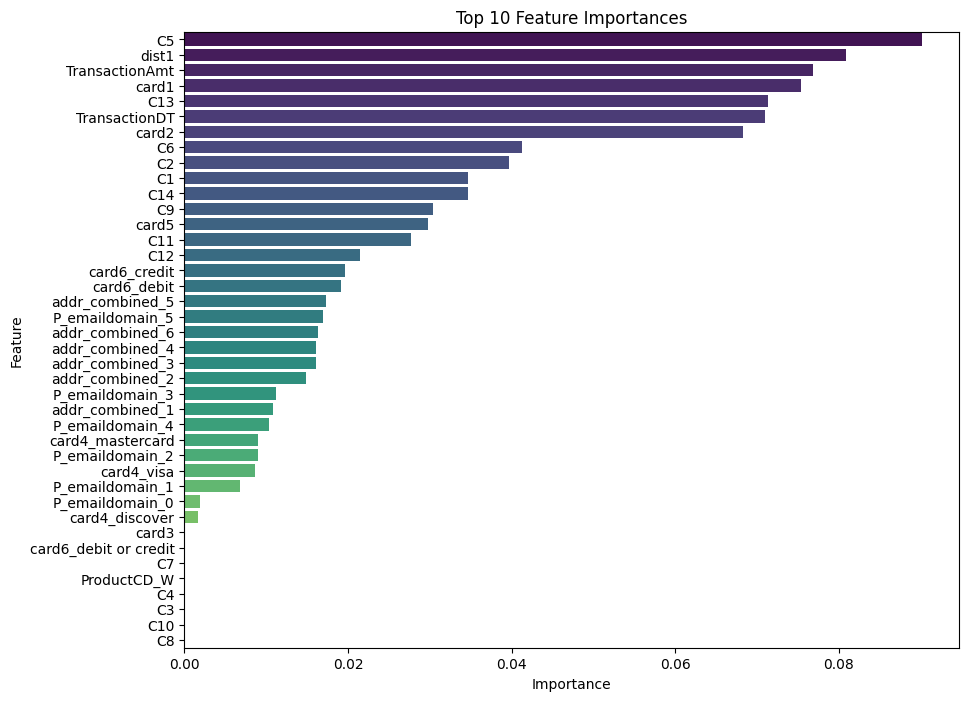

In [80]:

feature_importance = best_random_model.feature_importances_

# Obtener nombres de las características
feature_names = X_train_resampled.columns

# Crear un DataFrame para visualización
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Ordenar por importancia de forma descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualizar las 10 características más importantes
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(40), palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')
plt.show()

In [70]:

import joblib


dir_data_processed = '../models'
ruta_archivo_model = os.path.join(dir_data_processed, 'modelo_forest_agregado_c1-c14.pkl')

# Guardar el modelo
joblib.dump(best_random_model, ruta_archivo_model)




['../models/modelo_forest_agregado_c1-c14.pkl']

x_

In [71]:
# # Crear un clasificador XGBoost
# xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

In [72]:
# # Definir los parámetros que se van a probar en Grid Search
# param_grid = {
#     'n_estimators': [100, 200, 300],  # Número de árboles (boosting rounds)
#     'max_depth': [3, 4, 5],  # Profundidad máxima del árbol
#     'learning_rate': [0.1, 0.01, 0.05],  # Tasa de aprendizaje
#     'subsample': [0.8, 0.9, 1.0],  # Proporción de muestras utilizadas para entrenar cada árbol
#     'colsample_bytree': [0.8, 0.9, 1.0],  # Proporción de características utilizadas para entrenar cada árbol
#     'gamma': [0, 1, 5]  # Reducción de la pérdida mínima requerida para dividir un nodo
# }

# # Inicializar Grid Search
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)


{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}

## Utilizando Xgboost como segunda propuesta de modelo

In [73]:
# param_dist = {
#     'max_depth': [ 10],  # Profundidad máxima del árbol
#     'eta': [ 0.3],     # Tasa de aprendizaje (learning rate)
#     'objective': ['binary:logistic'],      # Función objetivo (clasificación binaria)
#     'eval_metric': ['logloss', 'auc']      # Métricas de evaluación
    
# }


# random_search = RandomizedSearchCV(
#     estimator=xgb_model,     # Modelo XGBoost
#     param_distributions=param_dist,  # Distribución de parámetros para explorar
#     n_iter=100,              # Número de combinaciones de hiperparámetros a probar
#     cv=5,                    # Número de divisiones para validación cruzada
#     scoring='roc_auc',       # Métrica de evaluación a optimizar (AUC-ROC)
#     n_jobs=-1,               # Número de núcleos para procesos en paralelo, -1 usa todos los disponibles
#     random_state=42          # Semilla para reproducibilidad de resultados
# )

In [74]:
# grid_search.fit(X_train_resampled, y_train_resampled)
# print("Mejores hiperparámetros encontrados por Grid Search:")
# print(grid_search.best_params_)


In [75]:
# random_search.fit(X_train_resampled, y_train_resampled)
# print("Mejores hiperparámetros encontrados por Random Search:")
# print(random_search.best_params_)


In [76]:


# # # Evaluación del modelo con los mejores parámetros encontrados por Grid Search
# # best_grid_model = grid_search.best_estimator_
# # print("Rendimiento del modelo con mejores parámetros (Grid Search):")
# # evaluate_model(best_grid_model, X_test, y_test)

# # Evaluación del modelo con los mejores parámetros encontrados por Random Search
# best_random_model = random_search.best_estimator_
# print("Rendimiento del modelo con mejores parámetros (Random Search):")
# evaluate_model(best_random_model, X_val, y_val)


In [77]:
# dir_data_processed = '../models'
# ruta_archivo_model = os.path.join(dir_data_processed, 'modelo_xgboost.bin')

# best_random_model.save_model(ruta_archivo_model )

## **Conlusión**

- No se observó una mejora significativa con la optimización en Random Forest, pero sí se encontró una ligera mejora con el modelo XGBoost, aunque sigue siendo marginal. Se sugiere considerar agregar o reemplazar la columna de TransactionAmt como una posible mejora para el entrenamiento del modelo.


- No se observó una mejora significativa con la optimización en Random Forest, pero sí se encontró una ligera mejora con el modelo XGBoost, aunque sigue siendo marginal. Se sugiere considerar agregar o reemplazar la columna de TransactionAmt como una posible mejora para el entrenamiento del modelo.